# Центральная предельная теорема своими руками

## Гамма распределение

Настраиваем и подключаем необходимое

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

Функция для отображения гистограммы выборки и плотности нужного распределения по верх гистограммы

In [2]:
def draw_hist_and_pdf(sampels_for_hist, dist, hist_label, pdf_label, xlabel, ylabel):
    # отображаем гистограму по выборке
    plt.hist(sampels_for_hist, normed=True, label=hist_label, bins=len(sampels_for_hist)/100)
    # генерируем x (аргументы функции плотности) от 0.01% квантили до 99.99% заданного распределения
    x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 1000)
    # отображаем функцию плотности распределения
    plt.plot(x, dist.pdf(x), color='red', linewidth=3, label=pdf_label)
    plt.legend(loc='best', frameon=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

Функция которая будет рассчитывать параметры нормального распределения и отображать графики. Параметризуется длиной выборки и нужным распределением. 

In [3]:
def estimate(sampel_size, dist, sampels_count=10000):
    # генерируем выборку sampel_size * sampels_count, потом делаем из нее матрицу sampels_count x sampel_size
    sampels = dist.rvs(size = sampel_size * sampels_count).reshape((sampels_count, sampel_size))
    # считаем среднее выборок
    estemated_means = np.mean(sampels, axis=1)
    # **ТОРЕТИЧЕСКИЕ** моменты исходного распределения
    # http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous
    tmean = dist.mean()
    tvar = dist.var()
    # нормальное приблежающее распределение
    mean_norm_dist = sts.norm(tmean, np.sqrt(tvar / sampel_size))
    
    print("Параметры нормального распределения которым мы приблежаем выборочные среднеи: E=%s, D=%s" % 
          (tmean, tvar / sampel_size))
    
    draw_hist_and_pdf(estemated_means, mean_norm_dist, "Means(n=%s)" % sampel_size, 
                      "$N$(%s, %s)" % (tmean, tvar / sampel_size), "$X$", "$frequency$ / $density$")
    

### Моменты гамма распределения

Гамма распределение имеет два параметра k и theta.
Его мат ожидание равно E = k\*theta и дисперсия D = k\*theta\*\*2

Фиксируем распределение

In [4]:
gamma = sts.gamma(a=2.0, scale=2.1) # a - это k, scale - это theta  

#### Моменты

In [5]:
print("E=%s" % gamma.mean())
print("D=%s" % gamma.var())

E=4.2
D=8.82


**Обратите внимание, что это именно теоретические моменты, рассчитаные из параметров распределения, а не по выборкам.**

Рисуем гистограму случайной выборки из распределения и теоретическую плотность распределения

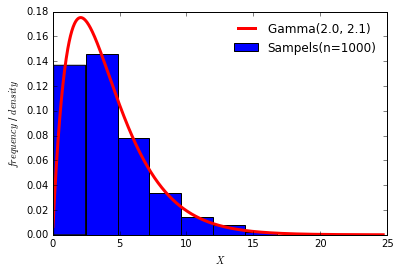

In [6]:
sampel_size = 1000
draw_hist_and_pdf(gamma.rvs(size=sampel_size), gamma, "Sampels(n=%s)" % sampel_size, 
                  "Gamma(%s, %s)" % (gamma.kwds['a'], gamma.kwds['scale']), "$X$", "$frequency$ / $density$")

#### Оцениваем параметры нормального распределения приблежающего среднии значения для разных длин выборок

Параметры нормального распределения которым мы приблежаем выборочные среднеи: E=4.2, D=1.764


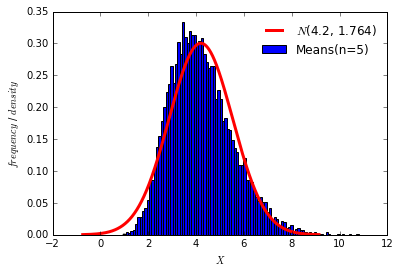

In [7]:
estimate(5, gamma)

Параметры нормального распределения которым мы приблежаем выборочные среднеи: E=4.2, D=0.882


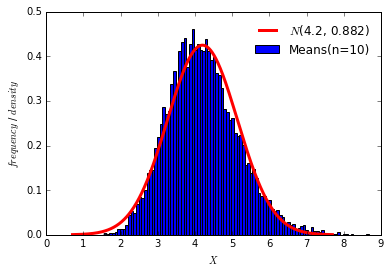

In [8]:
estimate(10, gamma)

Параметры нормального распределения которым мы приблежаем выборочные среднеи: E=4.2, D=0.1764


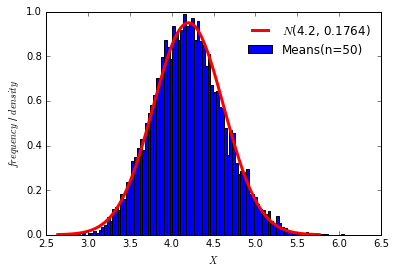

In [9]:
estimate(50, gamma)

Параметры нормального распределения которым мы приблежаем выборочные среднеи: E=4.2, D=0.0882


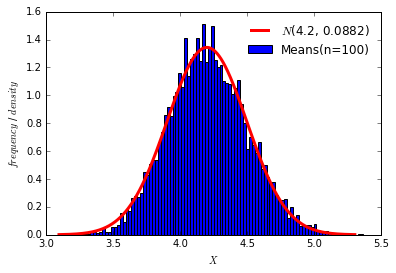

In [10]:
estimate(100, gamma)

Параметры нормального распределения которым мы приблежаем выборочные среднеи: E=4.2, D=0.00882


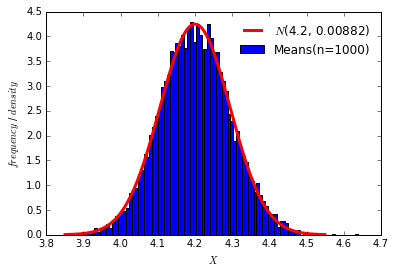

In [11]:
estimate(1000, gamma)

### Выводы

Разница между приблежающими распределениями только в дисперсии, которая уменьшается с ростом длины выборки. Это можно было бы сказать и просто глядя на определение. То есть с ростом длины выборки мы по сути уменьшаем разброс средних. От сюда можно еще сделать вывод, что чем длинее выборка, тем точнее оценка мат. ожидания по этой выборке.  